In [1]:
import time

import pandas as pd
import numpy as np
import random
from tqdm import tqdm

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# 自作関数
from dataload.data_load import data_load
from func.my_func import *

In [2]:
INPUT_DIR = '../data/'

df = pd.read_csv(INPUT_DIR + '1504_player_df.csv')
X = df.drop([
    'TargetDate',
    'y_bin',
    'y_num'
    ], axis=1)
y = df['y_bin']

In [3]:
y.mean()

0.08163265306122448

In [5]:
n_experiment = 10
ex_name = '0514'
data = 'id1504'

In [6]:
X

,StepSum,LowActivityHours,MaxValue,MinValue,RestValue,DiffRestValue,WakedUpValue,DiffWakedUpValue,SleepQuality,SleepHours,LightSleepHours,DeepSleepHours,SleepWakeCount
0,17568,6.6,159.000000,51.000000,72.000000,8.700000,69.000000,1.000000,3.000000,6.700000,4.000000,2.600000,0.000000
1,20762,8.0,182.000000,49.000000,68.000000,3.700000,68.000000,0.000000,4.000000,6.900000,3.700000,3.100000,0.000000
2,21443,5.5,168.000000,47.000000,62.000000,-2.800000,61.000000,-3.800000,3.000000,5.700000,3.300000,2.400000,0.000000
3,25805,4.6,171.000000,48.000000,60.000000,-5.000000,67.000000,1.200000,3.000000,8.200000,5.400000,2.800000,0.000000
4,5931,7.5,130.000000,46.000000,61.000000,-3.500000,59.000000,-5.800000,3.000000,4.800000,2.300000,2.500000,0.000000
5,14598,10.0,113.000000,49.000000,67.000000,2.500000,69.000000,3.700000,4.000000,6.800000,3.600000,3.100000,0.000000
6,27546,4.2,182.000000,43.000000,82.000000,17.400000,68.000000,2.400000,3.000000,5.800000,3.000000,2.800000,0.000000
7,32047,6.0,163.000000,66.000000,85.000000,20.400000,78.000000,12.400000,3.000000,5.900000,3.200000,2.600000,0.000000
8,12596,7.8,148.000000,48.000000,77.000000,12.400000,88.000000,22.400000,3.051282,6.576923,3.764103,2.748718,0.153846
9,16140,6.0,154.000000,55.000000,75.000000,10.400000,65.282051,0.266667,2.000000,7.700000,4.200000,3.500000,0.000000


AUC            0.596154
accuracy       0.466667
recall         0.461538
Specificity         0.5
precision      0.857143
gmeans         0.480384
RS             0.923077
Name: 0, dtype: object

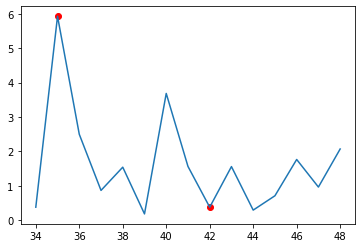

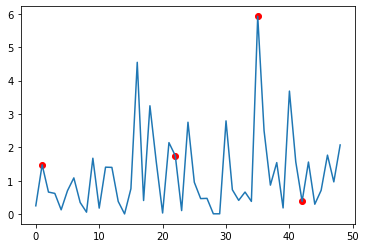

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# 使用する7つの変数をランダムに取得する
# バギングをする際はそれぞれのサブサンプルで7つの変数を選択する．
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
random_s = random.sample(list(X.columns), len(X.columns) if len(X.columns) < 7 else 7)
X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

result_scaler, result_inv_C, select_columns = fit_MTS(X_train, y_train)

y_train_pred = predict_MD(X_train, result_scaler, result_inv_C, select_columns)

threshold = determine_threshold(y_train, y_train_pred)

y_proba = predict_MD(X_test, result_scaler, result_inv_C, select_columns)
y_pred = y_proba > threshold

result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()
sns.lineplot(x=X.index, y=predict_MD(X, result_scaler, result_inv_C, select_columns))
plt.scatter(x=y[y == 1].index, y=predict_MD(X, result_scaler, result_inv_C, select_columns)[y == 1], c='r')
plt.show()

AUC            0.538462
accuracy       0.533333
recall         0.538462
Specificity         0.5
precision         0.875
gmeans         0.518875
RS             1.076923
Name: 0, dtype: object

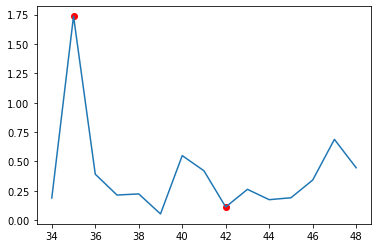

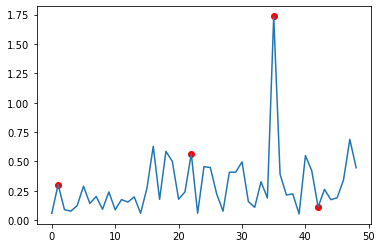

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
# 使用する7つの変数をランダムに取得する
# バギングをする際はそれぞれのサブサンプルで7つの変数を選択する．
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
random_s = random.sample(list(X.columns), len(X.columns) if len(X.columns) < 7 else 7)
X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight = fit_WMTGS(X_train, y_train)
y_train_pred = cal_gram_WMD_by_reduced_model(X_train, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight)

threshold = determine_threshold(y_train, y_train_pred)

y_proba, y_pred = predict_WMTGS(X_test, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight, threshold)


result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()
all_pred, _ = predict_WMTGS(X, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight, threshold)

sns.lineplot(x=X.index, y=all_pred)
plt.scatter(x=y[y == 1].index, y=all_pred[y == 1], c='r')
plt.show()

In [116]:
select_columns

Index(['LowActivityHours', 'WakedUpValue', 'DiffWakedUpValue', 'MinValue'], dtype='object')

In [117]:
select_columns_weight

array([0.38243862194695616, 0.19496927328404254, 0.2058723606175655,
       0.2167197441514358], dtype=object)

In [123]:
pd.DataFrame(reduced_model_scaler.transform(X[select_columns]))

,0,1,2,3
0,0.527951,0.436603,0.107469,0.076200
1,1.038797,0.306062,-0.023126,-0.216533
2,0.126571,-0.607730,-0.519390,-0.509267
3,-0.201830,0.175520,0.133589,-0.362900
4,0.856352,-0.868814,-0.780582,-0.655634
5,1.768577,0.436603,0.460078,-0.216533
6,-0.347786,0.306062,0.290304,-1.094735
7,0.309016,1.611479,1.596261,2.271703
8,0.965819,2.916896,2.902219,-0.362900
9,0.309016,-0.048744,0.011699,0.661668


AUC            0.984991
accuracy       0.944444
recall         0.923077
Specificity     0.95122
precision      0.857143
gmeans         0.937043
RS             0.970414
Name: 0, dtype: object

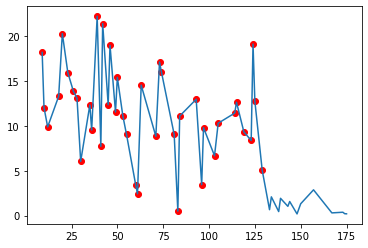

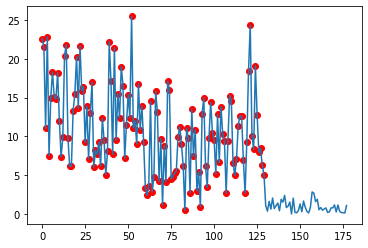

In [125]:
X, y = data_load('wine')

import seaborn as sns
import matplotlib.pyplot as plt
# 使用する7つの変数をランダムに取得する
# バギングをする際はそれぞれのサブサンプルで7つの変数を選択する．
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
random_s = random.sample(list(X.columns), len(X.columns) if len(X.columns) < 7 else 7)
X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

result_scaler, result_inv_C, select_columns = fit_MTS(X_train, y_train)

y_train_pred = predict_MD(X_train, result_scaler, result_inv_C, select_columns)

threshold = determine_threshold(y_train, y_train_pred)

y_proba = predict_MD(X_test, result_scaler, result_inv_C, select_columns)
y_pred = y_proba > threshold

result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()
sns.lineplot(x=X.index, y=predict_MD(X, result_scaler, result_inv_C, select_columns))
plt.scatter(x=y[y == 1].index, y=predict_MD(X, result_scaler, result_inv_C, select_columns)[y == 1], c='r')
plt.show()

AUC            0.955592
accuracy       0.925926
recall              1.0
Specificity    0.894737
precision           0.8
gmeans         0.945905
RS             1.117647
Name: 0, dtype: object

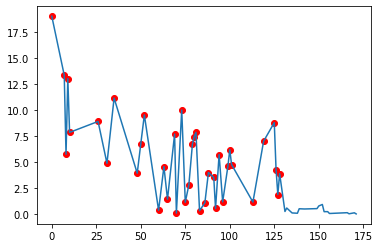

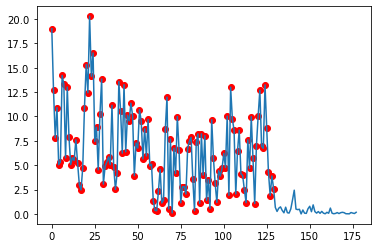

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
# 使用する7つの変数をランダムに取得する
# バギングをする際はそれぞれのサブサンプルで7つの変数を選択する．
result_df = pd.DataFrame(
                            columns=['AUC', 'accuracy', 'recall', 'Specificity', 'precision', 'gmeans', 'RS'],
                            index=range(n_experiment))
random_s = random.sample(list(X.columns), len(X.columns) if len(X.columns) < 7 else 7)
X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight = fit_WMTGS(X_train, y_train)
y_train_pred = cal_gram_WMD_by_reduced_model(X_train, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight)

threshold = determine_threshold(y_train, y_train_pred)

y_proba, y_pred = predict_WMTGS(X_test, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight, threshold)


result_df = make_result_df(result_df, y_test, y_pred, y_proba, 0)
display(result_df.iloc[0])
sns.lineplot(x=X_test.index, y=y_proba)
plt.scatter(x=y_test[y_test == 1].index, y=y_proba[y_test == 1], c='r')
plt.show()
all_pred, _ = predict_WMTGS(X, reduced_model_scaler, reduced_model_t, reduced_model_ips, select_columns, select_columns_weight, threshold)

sns.lineplot(x=X.index, y=all_pred)
plt.scatter(x=y[y == 1].index, y=all_pred[y == 1], c='r')
plt.show()

In [129]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: y, Length: 178, dtype: int64

In [130]:

y_test

35     1
166    0
119    1
60     1
79     1
135    0
155    0
100    1
92     1
132    0
48     1
167    0
73     1
113    1
99     1
149    0
150    0
171    0
63     1
77     1
7      1
94     1
9      1
69     1
0      1
152    0
170    0
86     1
26     1
52     1
8      1
139    0
10     1
65     1
156    0
153    0
50     1
96     1
75     1
127    1
142    0
88     1
125    1
101    1
126    1
131    0
31     1
138    0
128    1
81     1
83     1
80     1
70     1
91     1
Name: y, dtype: int64